## Apply Inferential Statistics On White Wine Dataset
---

In this section, we will analyze the dataset to find the physiochemical attributes that are most highly correlated to the quality of wine and inference the population with those attributes. To apply inferential statistics on the dataset, we have to make an assumption that the quality ratings are trustworthy.

### Correlation analysis

To view the correlations of each attributes, we can create a correlation heat-map.

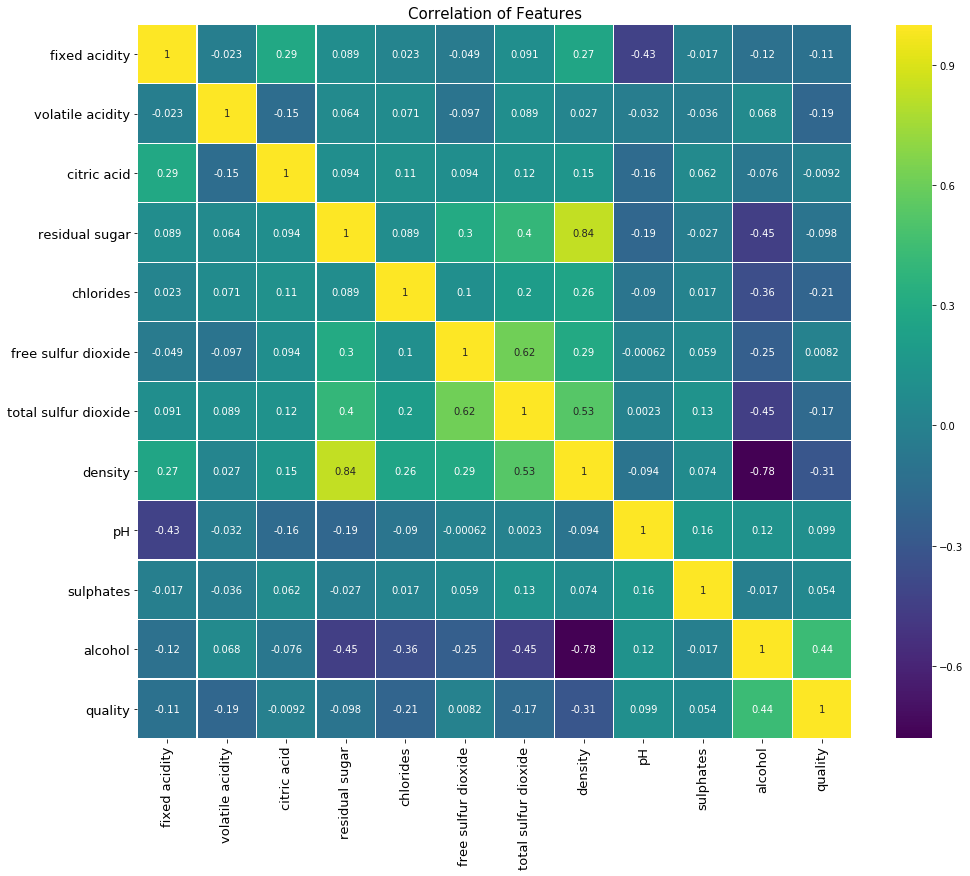

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from plotly.graph_objs import *
import seaborn as sns
import plotly.plotly as py
import plotly.tools as tls

#load the white wine quality dataset.
filename = 'winequality-white.csv' 
df = pd.read_csv(filename, sep=';')

# create a correlation heatmap
colormap = plt.cm.viridis
plt.figure(figsize=(16,16))
plt.title('Correlation of Features', size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, cbar_kws={"shrink": .82})
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.savefig('Features_correlation.pdf', bbox_inches='tight')

As we can see, there are significant positive correlation between liquid density and residual sugar, and both sulfur dioxide attributes. Alcohol level and density have strong negative correlation.

Overall, only alcohol level and density are the only attributes that have either positive or negative correlation to quality above the absolute value of 0.3. Since density and alcohol level are correlated, we can say that alcohol level on its own, has the highest correlation to the quality of wine.

---

### Inferencing the dataset based on alcohol content

Since we know that alcohol content is the major factor to the quality of white wine samples, we can estimate the alcohol content of wine within each quality group by inferential statistics. 

In [2]:
#generates counts of wine samples by each quality score.
count = df.quality.value_counts().sort_index()
count

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

The counts shows that the majority of wine samples in the dataset are score between 5 and 7. In this case, we can meger some of the lower quality wines into one group and higher quality wines into another group:

+ **good** wine are scored seven or above
+ **mediocre** wines are scored at six
+ **bad** wines are scored five or below

We can explore the differences between the mean in alcohol content of each quality group graphically as quality score groups and as the three major groups:

In [3]:
#Separate data into poor, mediocre, and desirable wines
def quality_grading(quality):
    if quality > 6:
        return 2
    elif quality == 6:
        return 1
    else:
        return 0

In [4]:
df['desirable_label'] = df['quality'].apply(quality_grading)

count_label = df.desirable_label.value_counts().sort_index()
count_label

0    1640
1    2198
2    1060
Name: desirable_label, dtype: int64

   quality  alcohol
0        3    10.45
1        4    10.10
2        5     9.50
3        6    10.50
4        7    11.40
5        8    12.00
6        9    12.50


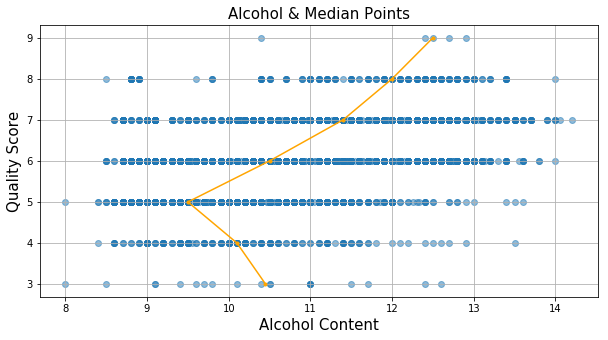

In [22]:
quality = sorted(df.quality.unique())
med_points = pd.DataFrame()
med_points['quality'] = quality
y = pd.DataFrame()
for n in quality:
    iterated = df.loc[df.quality == n]
    x = iterated.alcohol.median()
    y = y.append({'alcohol': x}, ignore_index=True)
med_points = pd.concat([med_points, y], axis=1)
print(med_points)

plt.figure(figsize=(10,5))
plt.grid()
plt.scatter(df['alcohol'],df['quality'], alpha=0.5)
plt.plot(med_points['alcohol'],med_points['quality'], marker='.',c='orange')
plt.xlabel('Alcohol Content', size=15)
plt.ylabel('Quality Score', size=15)
plt.title('Alcohol & Median Points', size=15)
plt.savefig('Alcohol_&_Median_Points.pdf', bbox_inches='tight')

   desirable_label  alcohol
0                0      9.6
1                1     10.5
2                2     11.5


Text(0.5,1,'Alcohol & Median Points')

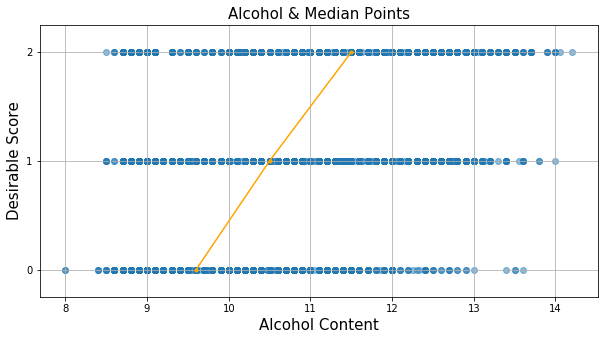

In [16]:
desirable_label = sorted(df.desirable_label.unique())
med_points = pd.DataFrame()
med_points['desirable_label'] = desirable_label
y = pd.DataFrame()
for n in desirable_label:
    iterated = df.loc[df.desirable_label == n]
    x = iterated.alcohol.median()
    y = y.append({'alcohol': x}, ignore_index=True)
med_points = pd.concat([med_points, y], axis=1)
print(med_points)

plt.figure(figsize=(10,5))
plt.grid()
plt.scatter(df['alcohol'],df['desirable_label'], alpha=0.5)
plt.plot(med_points['alcohol'],med_points['desirable_label'], marker='.',c='orange')
plt.xlabel('Alcohol Content', size=15)
plt.ylabel('Desirable Score', size=15)
plt.yticks(np.arange(0, 3, step=1))
plt.ylim([-0.25, 2.25])
plt.title('Alcohol & Median Points', size=15)

Looks like the relationship between the means in alcohol distribution among the groups is linear by observing both graphs above. Furthermore, we can construct empirical cumulative distribution function (ECDF) of each quality group by alcohol.

In [7]:
# Separate the dataset into 3 subgroups by the desirable groups
df_poor = df.loc[df['quality'].isin(['3','4','5'])]
df_mediocre = df.loc[df['quality'] == 6]
df_desirable = df.loc[df['quality'].isin(['7','8','9'])]

In [8]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

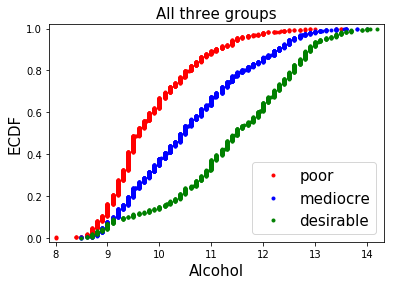

In [21]:
plt.figure()
x_1, y_1 = ecdf(df_poor['alcohol'])
x_2, y_2 = ecdf(df_mediocre['alcohol'])
x_3, y_3 = ecdf(df_desirable['alcohol'])
plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', label='poor')
plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', label='mediocre')
plt.plot(x_3, y_3, marker='.', linestyle='none', color='green', label='desirable')

# Label axes, set margin, and show plot

plt.margins(0.02)
plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('ECDF', fontsize=15)
plt.title('All three groups', fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.savefig('Alcohol_ECDF.pdf')
plt.show()

We can see the ECDF of each group are obviously different. We can conduct two permutation tests between these three groups to see whether their probabilistic distribution in alcohol content are identical.

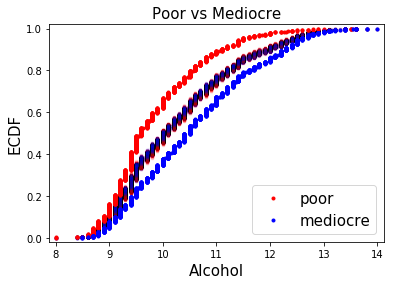

In [11]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(df_poor['alcohol'], df_mediocre['alcohol'])

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(df_poor['alcohol'])
x_2, y_2 = ecdf(df_mediocre['alcohol'])
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', label='poor')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', label='mediocre')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('Alcohol', fontsize=15)
_ = plt.ylabel('ECDF', fontsize=15)
plt.title('Poor vs Mediocre', fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.show()

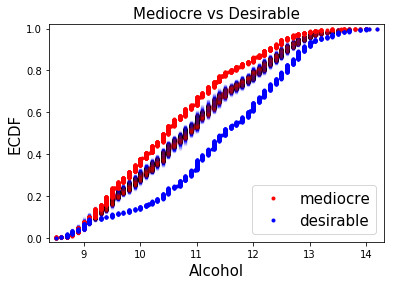

In [12]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(df_mediocre['alcohol'], df_desirable['alcohol'])

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(df_mediocre['alcohol'])
x_2, y_2 = ecdf(df_desirable['alcohol'])
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', label='mediocre')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', label='desirable')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('Alcohol',fontsize=15)
_ = plt.ylabel('ECDF',fontsize=15)
plt.title('Mediocre vs Desirable', fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.show()

As we can see that the permutated ECDFs are no where close to the actual data, which suggest the probabilistic distribution of the means are no identitical.

---

## Feature Distribution

Besides alcohol, we can also look at how each feature distribtuion differ according to the quality groups. Since we are looking at the difference in distribution, we can simply use the wrangled data to constuct the distribution charts. The wrangled data has normalized 4 features by putting them through log, which are residual sugar, chlorides, free and total sulfur dioxide.

In [13]:
# Prepare wrangled data
df['chlorides'] = np.log(df['chlorides'])
df['residual sugar'] = np.log(df['residual sugar'])
df['total sulfur dioxide'] = np.log(df['total sulfur dioxide'])
df['free sulfur dioxide'] = np.log(df['free sulfur dioxide'])

# Separate the dataset into 3 subgroups by the desirable groups
df_poor = df.loc[df['quality'].isin(['3','4','5'])]
df_mediocre = df.loc[df['quality'] == 6]
df_desirable = df.loc[df['quality'].isin(['7','8','9'])]

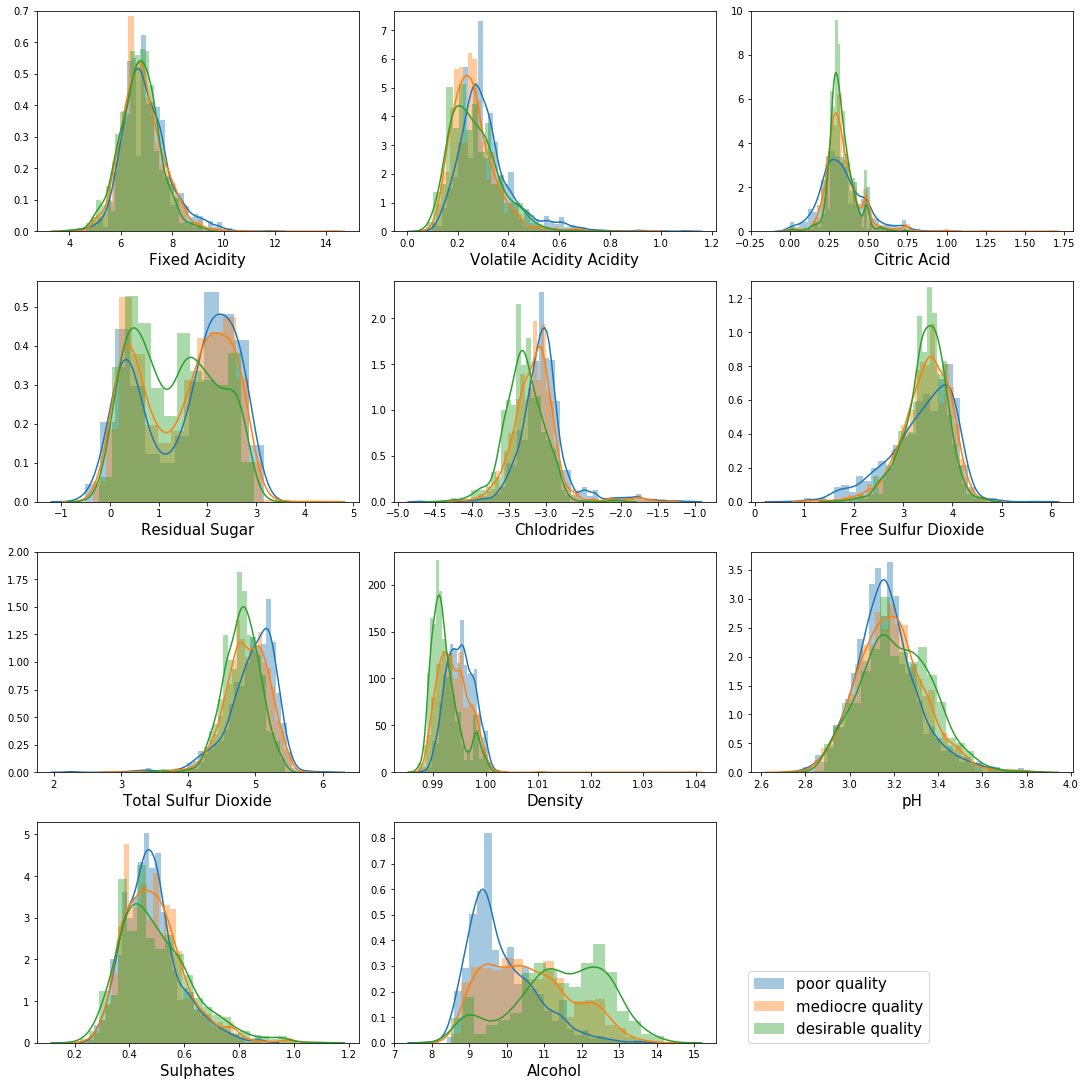

In [14]:
#Construct histograms of each feature by quality groups
f = plt.figure(figsize=(15,15))
ax = plt.subplot(431)
sns.distplot(df_poor['fixed acidity'], label = 'poor quality')
sns.distplot(df_mediocre['fixed acidity'], label = 'mediocre quality')
sns.distplot(df_desirable['fixed acidity'], label = 'desirable quality')
plt.xlabel('Fixed Acidity', fontsize=15)
plt.ylim(0, 0.7)

ax = plt.subplot(432)
sns.distplot(df_poor['volatile acidity'], label = 'poor quality')
sns.distplot(df_mediocre['volatile acidity'], label = 'mediocre quality')
sns.distplot(df_desirable['volatile acidity'], label = 'desirable quality')
plt.xlabel('Volatile Acidity Acidity', fontsize=15)

ax = plt.subplot(433)
sns.distplot(df_poor['citric acid'], label = 'poor quality')
sns.distplot(df_mediocre['citric acid'], label = 'mediocre quality')
sns.distplot(df_desirable['citric acid'], label = 'desirable quality')
plt.ylim(0, 10)
plt.xlim(-.25, None)
plt.xlabel('Citric Acid', fontsize=15)

ax = plt.subplot(434)
sns.distplot(df_poor['residual sugar'], label = 'poor quality')
sns.distplot(df_mediocre['residual sugar'], label = 'mediocre quality')
sns.distplot(df_desirable['residual sugar'], label = 'desirable quality')
plt.xlabel('Residual Sugar', fontsize=15)

ax = plt.subplot(435)
sns.distplot(df_poor['chlorides'], label = 'poor quality')
sns.distplot(df_mediocre['chlorides'], label = 'mediocre quality')
sns.distplot(df_desirable['chlorides'], label = 'desirable quality')
plt.xlabel('Chlodrides', fontsize=15)

ax = plt.subplot(436)
sns.distplot(df_poor['free sulfur dioxide'], label = 'poor quality')
sns.distplot(df_mediocre['free sulfur dioxide'], label = 'mediocre quality')
sns.distplot(df_desirable['free sulfur dioxide'], label = 'desirable quality')
plt.ylim(0, 1.3)
plt.xlabel('Free Sulfur Dioxide', fontsize=15)

ax = plt.subplot(437)
sns.distplot(df_poor['total sulfur dioxide'], label = 'poor quality')
sns.distplot(df_mediocre['total sulfur dioxide'], label = 'mediocre quality')
sns.distplot(df_desirable['total sulfur dioxide'], label = 'desirable quality')
plt.ylim(0, 2)
plt.xlabel('Total Sulfur Dioxide', fontsize=15)

ax = plt.subplot(438)
sns.distplot(df_poor['density'], label = 'poor quality')
sns.distplot(df_mediocre['density'], label = 'mediocre quality')
sns.distplot(df_desirable['density'], label = 'desirable quality')
plt.xlabel('Density', fontsize=15)
plt.ylim(0, 235)

ax = plt.subplot(439)
sns.distplot(df_poor['pH'], label = 'poor quality')
sns.distplot(df_mediocre['pH'], label = 'mediocre quality')
sns.distplot(df_desirable['pH'], label = 'desirable quality')
plt.xlabel('pH', fontsize=15)

ax = plt.subplot(4,3,10)
sns.distplot(df_poor['sulphates'], label = 'poor quality')
sns.distplot(df_mediocre['sulphates'], label = 'mediocre quality')
sns.distplot(df_desirable['sulphates'], label = 'desirable quality')
plt.xlabel('Sulphates', fontsize=15)

ax = plt.subplot(4,3,11)
sns.distplot(df_poor['alcohol'], label = 'poor quality')
sns.distplot(df_mediocre['alcohol'], label = 'mediocre quality')
sns.distplot(df_desirable['alcohol'], label = 'desirable quality')
plt.xlabel('Alcohol', fontsize=15)

plt.legend(loc=(1.1,0), fontsize=15)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('Histogram_3_groups.pdf', bbox_inches='tight')

The distribution of some of the features are visibily different, such as alcohol and density, which is associated to their higher correlation toward quality. The features with the least variation among quality groups are fixed acidty, citric acid, free sulfur dioxide, and sulphates. This is observable by the amount of overlapping between each quality groups.